<a href="https://www.kaggle.com/code/lalit7881/psychological-manipulation-detection-99-acc?scriptVersionId=300742600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/tatheerabbas/psychological-manipulation-conversations-dataset/manipulational_conversation.jsonl


## Import dataset

In [2]:
df = pd.read_json('/kaggle/input/datasets/tatheerabbas/psychological-manipulation-conversations-dataset/manipulational_conversation.jsonl',lines=True)
pd.set_option("display.max_columns",None)
df.shape

(10000, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   conversation_id              10000 non-null  object 
 1   manipulation_type            10000 non-null  object 
 2   is_manipulation              10000 non-null  bool   
 3   context_type                 10000 non-null  object 
 4   conversation_length          10000 non-null  int64  
 5   manipulation_intensity       10000 non-null  float64
 6   messages                     10000 non-null  object 
 7   target_confusion             10000 non-null  float64
 8   guilt_level                  10000 non-null  float64
 9   fear_level                   10000 non-null  float64
 10  anxiety_level                10000 non-null  float64
 11  self_doubt                   10000 non-null  float64
 12  target_extraversion          10000 non-null  float64
 13  target_emotional_

In [4]:
df.describe()

,conversation_length,manipulation_intensity,target_confusion,guilt_level,fear_level,anxiety_level,self_doubt,target_extraversion,target_emotional_resilience,target_assertiveness,avg_response_delay_seconds,word_count_total,question_count,denial_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5.502300,0.517148,0.344116,0.321732,0.245987,0.438082,0.392572,0.502461,0.303966,0.328283,195.177200,37.166400,1.04590,3.383000
std,1.709177,0.294557,0.235967,0.231932,0.262769,0.253414,0.234436,0.286287,0.192512,0.209750,154.763492,11.492707,0.96555,2.290161
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,18.000000,4.000000,0.00000,0.000000
25%,4.000000,0.335000,0.146000,0.156000,0.063000,0.217000,0.205000,0.256000,0.160000,0.170000,73.000000,28.000000,0.00000,2.000000
50%,6.000000,0.561000,0.308000,0.280000,0.162500,0.439000,0.395500,0.507000,0.268000,0.288000,122.000000,37.000000,1.00000,3.000000
75%,7.000000,0.747000,0.526000,0.405000,0.300000,0.659000,0.528000,0.748000,0.408000,0.442000,288.000000,46.000000,2.00000,5.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,599.000000,67.000000,5.00000,12.000000


In [5]:
df.dtypes

conversation_id                 object
manipulation_type               object
is_manipulation                   bool
context_type                    object
conversation_length              int64
manipulation_intensity         float64
messages                        object
target_confusion               float64
guilt_level                    float64
fear_level                     float64
anxiety_level                  float64
self_doubt                     float64
target_extraversion            float64
target_emotional_resilience    float64
target_assertiveness           float64
target_attachment_style         object
avg_response_delay_seconds       int64
escalation_pattern              object
word_count_total                 int64
question_count                   int64
denial_count                     int64
dtype: object

In [6]:
df.shape

(10000, 21)

In [7]:
df.isnull().sum()

conversation_id                0
manipulation_type              0
is_manipulation                0
context_type                   0
conversation_length            0
manipulation_intensity         0
messages                       0
target_confusion               0
guilt_level                    0
fear_level                     0
anxiety_level                  0
self_doubt                     0
target_extraversion            0
target_emotional_resilience    0
target_assertiveness           0
target_attachment_style        0
avg_response_delay_seconds     0
escalation_pattern             0
word_count_total               0
question_count                 0
denial_count                   0
dtype: int64

In [8]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        df[col] = df[col].astype(str)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
print(df.columns)

Index(['conversation_id', 'manipulation_type', 'is_manipulation',
       'context_type', 'conversation_length', 'manipulation_intensity',
       'messages', 'target_confusion', 'guilt_level', 'fear_level',
       'anxiety_level', 'self_doubt', 'target_extraversion',
       'target_emotional_resilience', 'target_assertiveness',
       'target_attachment_style', 'avg_response_delay_seconds',
       'escalation_pattern', 'word_count_total', 'question_count',
       'denial_count'],
      dtype='object')


In [11]:
# Remove duplicates
df = df.drop_duplicates()

# Convert list columns to string (for safe operations)
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        df[col] = df[col].astype(str)

# Fill missing values (numeric only)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Cleaned Shape:", df.shape)

Cleaned Shape: (10000, 21)


## Data visualizations

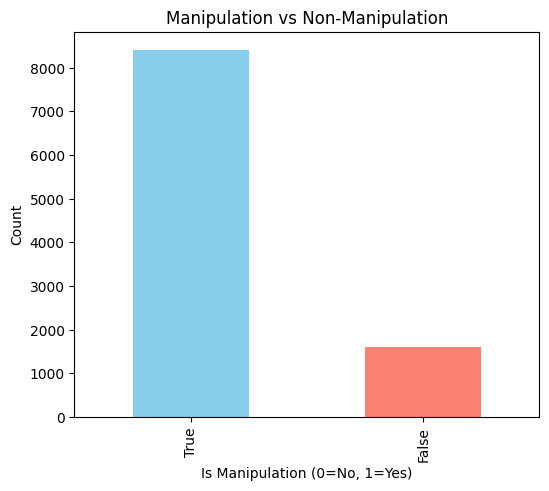

In [12]:
plt.figure(figsize=(6,5))
df['is_manipulation'].value_counts().plot(
    kind='bar',
    color=['skyblue','salmon']
)
plt.title("Manipulation vs Non-Manipulation")
plt.xlabel("Is Manipulation (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

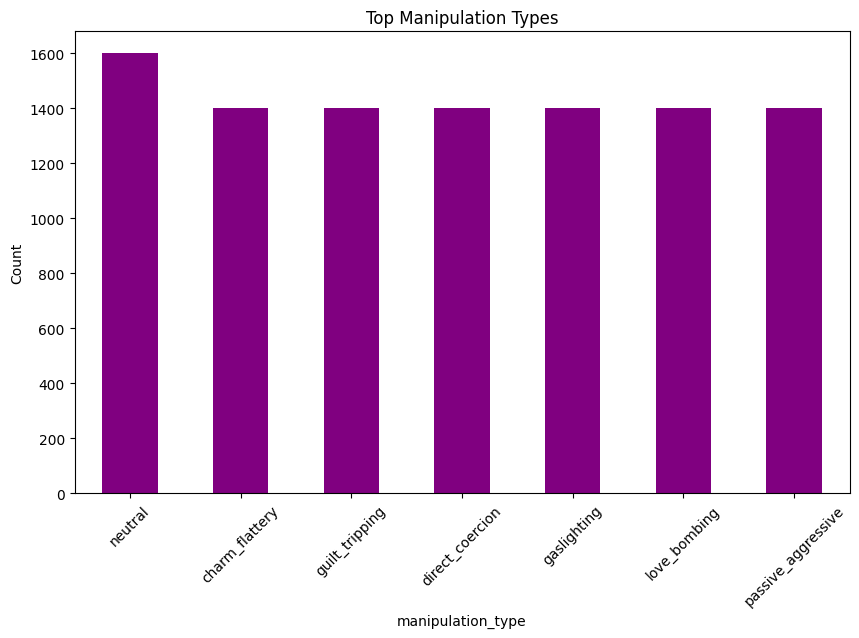

In [13]:
plt.figure(figsize=(10,6))
df['manipulation_type'].value_counts().head(10).plot(
    kind='bar',
    color='purple'
)
plt.title("Top Manipulation Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

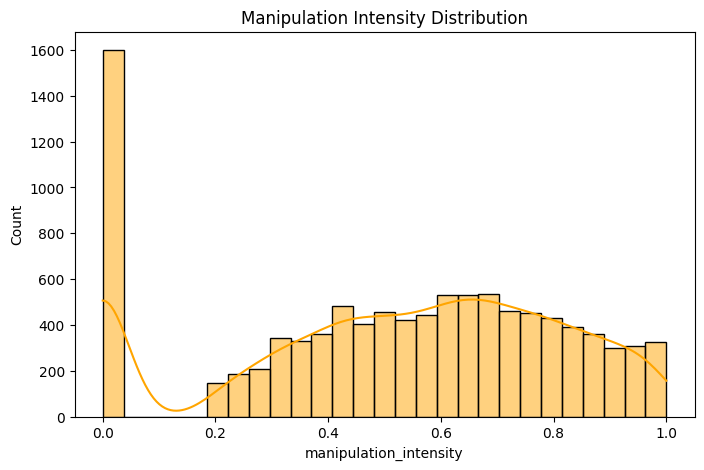

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['manipulation_intensity'],
             kde=True,
             color='orange')
plt.title("Manipulation Intensity Distribution")
plt.show()

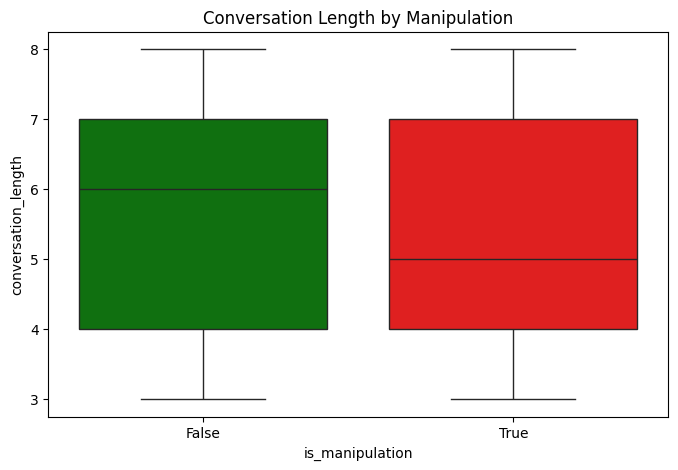

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_manipulation',
            y='conversation_length',
            data=df,
            palette=['green','red'])
plt.title("Conversation Length by Manipulation")
plt.show()

<Figure size 1000x600 with 0 Axes>

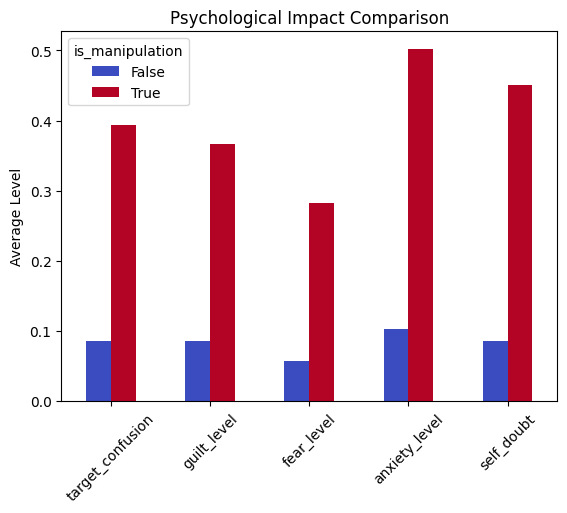

In [16]:
psych_cols = [
    'target_confusion',
    'guilt_level',
    'fear_level',
    'anxiety_level',
    'self_doubt'
]

plt.figure(figsize=(10,6))
df.groupby('is_manipulation')[psych_cols].mean().T.plot(
    kind='bar',
    colormap='coolwarm'
)
plt.title("Psychological Impact Comparison")
plt.ylabel("Average Level")
plt.xticks(rotation=45)
plt.show()

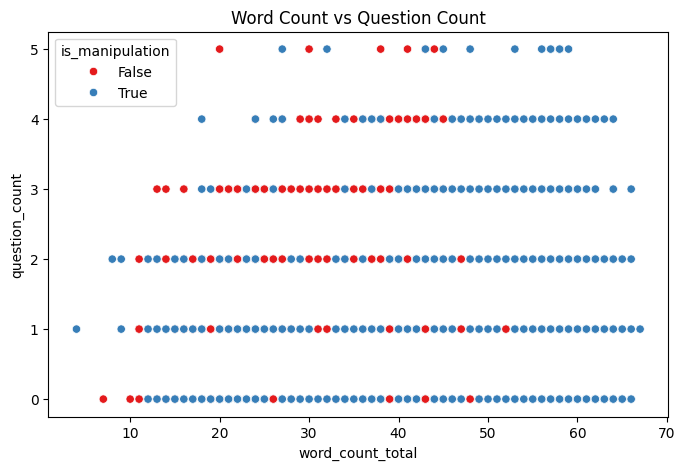

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='word_count_total',
                y='question_count',
                hue='is_manipulation',
                data=df,
                palette='Set1')
plt.title("Word Count vs Question Count")
plt.show()

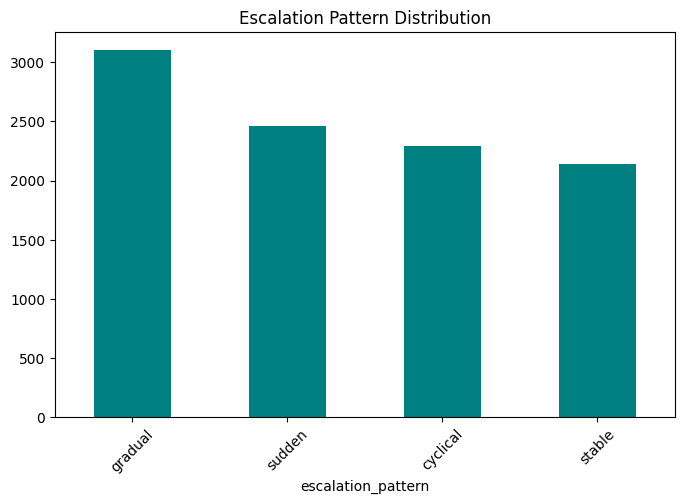

In [18]:
plt.figure(figsize=(8,5))
df['escalation_pattern'].value_counts().plot(
    kind='bar',
    color='teal'
)
plt.title("Escalation Pattern Distribution")
plt.xticks(rotation=45)
plt.show()


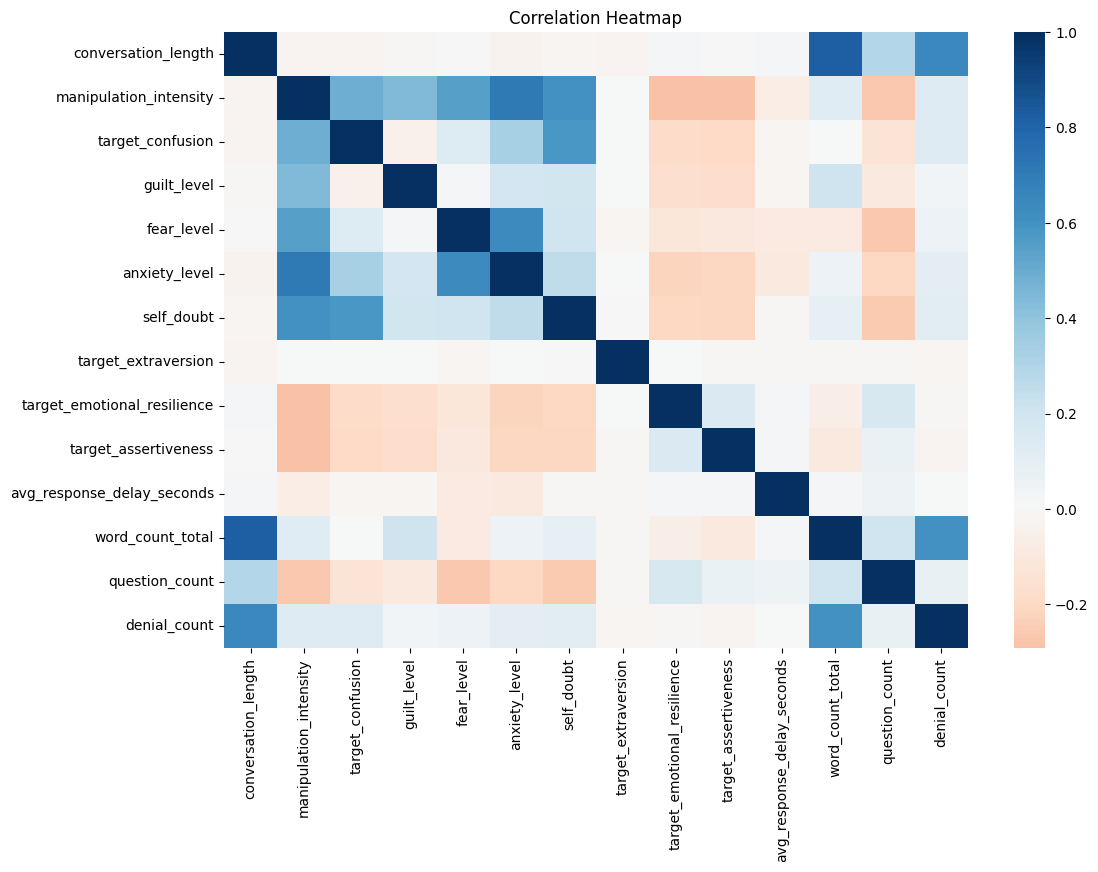

In [19]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()

sns.heatmap(corr,
            cmap='RdBu',
            center=0)
plt.title("Correlation Heatmap")
plt.show()

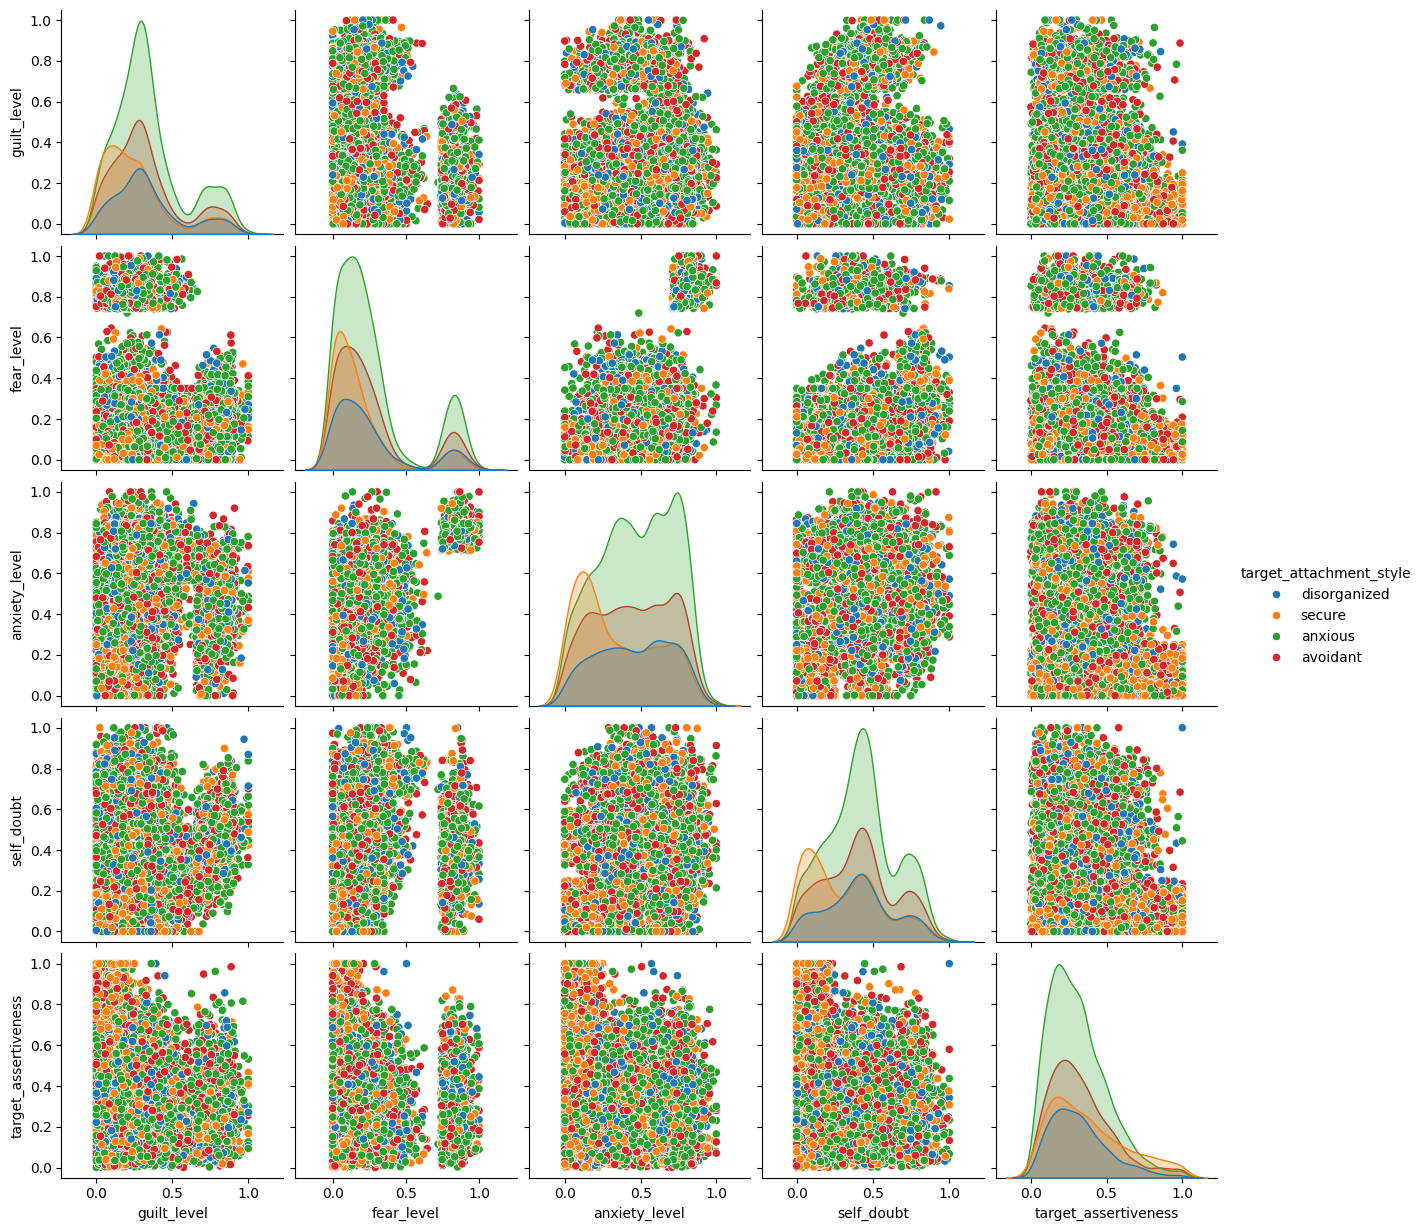

In [20]:
selected_cols = [
    "guilt_level",
    "fear_level",
    "anxiety_level",
    "self_doubt",
    "target_assertiveness"
]
sns.pairplot(
    df[selected_cols + ["target_attachment_style"]],
    hue="target_attachment_style",
    diag_kind="kde"
)
plt.show()

## Feature engg

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
# Encode manipulation_type (Target)
le = LabelEncoder()
df['manipulation_type'] = le.fit_transform(df['manipulation_type'])

In [23]:
# Drop target first
X = df.drop(['manipulation_type'], axis=1)

# Keep only numeric columns (important)
X = X.select_dtypes(include=np.number)

y = df['manipulation_type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)   # Fit on train
X_test = scaler.transform(X_test)         # Transform test only

In [26]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr) * 100
print(f"Logistic Regression Accuracy: {acc_lr:.2f}%")

Logistic Regression Accuracy: 98.50%


In [27]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {acc_rf:.2f}%")

Random Forest Accuracy: 99.00%


In [28]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {acc_svm:.2f}%")

SVM Accuracy: 98.05%


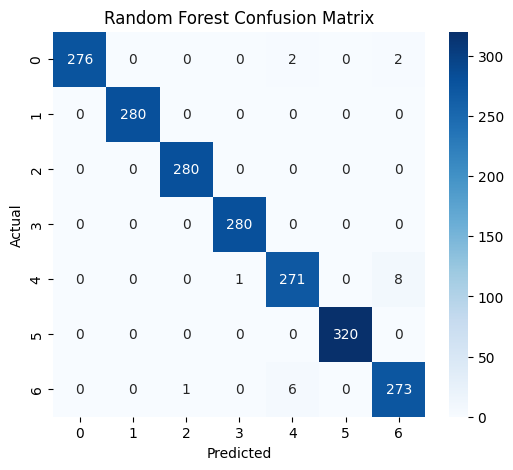

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True,
            fmt='d',
            cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

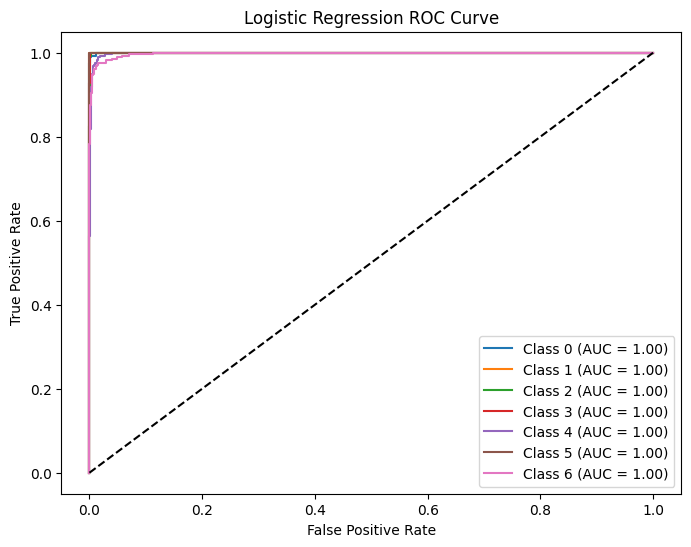

In [30]:
from sklearn.preprocessing import label_binarize

# Binarize target
y_test_bin = label_binarize(y_test, classes=np.unique(y))

plt.figure(figsize=(8,6))

for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

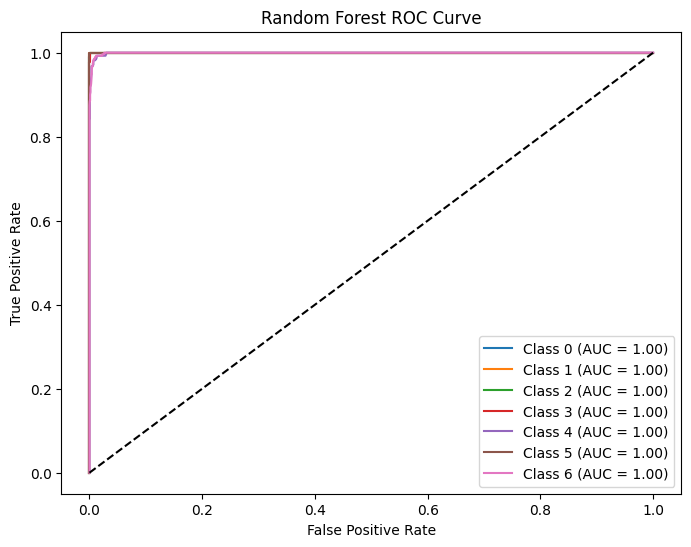

In [31]:
plt.figure(figsize=(8,6))

for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [32]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy (%)": [acc_lr, acc_rf, acc_svm]
})

print(results)

                 Model  Accuracy (%)
0  Logistic Regression         98.50
1        Random Forest         99.00
2                  SVM         98.05


## Thank you..pls upvote!!!!!1